In [14]:
import sys
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

import pandas as pd
from tqdm import tqdm
import xarray as xr
from matplotlib import colors
from tqdm import tqdm
import cmocean
from cmocean import cm as cmo
import seaborn as sns
from mpl_toolkits.basemap import Basemap

import netCDF4 as nc4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='grey')#cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor='grey')#cfeature.COLORS['land'])

coast_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='black',
                                        facecolor='none')

coast_10m = cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                                        edgecolor='black',
                                        facecolor='none')

topog = cfeature.NaturalEarthFeature(
    category='raster',
    name='natural_earth_hypsometric',
    scale='50m',
    facecolor='none')

In [48]:
f=glob.glob('./data/composites/*.nc')[0]
ds = renamer(xr.open_dataset(f))['anomaly']

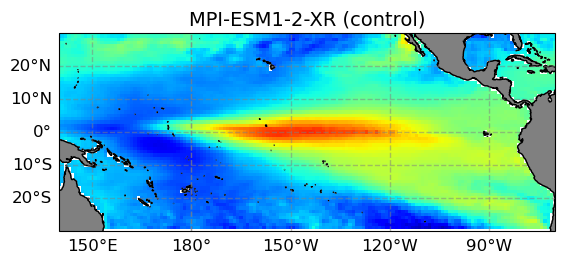

In [49]:
projection = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(1,1, subplot_kw={'projection': projection})
# Add the bounding box as a filled rectangle
# Rectangle([xmin, ymin], width, height)
cbar = ds.isel(depth = 0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat', cmap='jet', add_colorbar=False, 
                          vmin = -0.75, vmax = 1.5, extend = 'both')
ax.set_extent([140, 290, -30, 30], crs=ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.add_feature(coast_50m)
# Add latitude and longitude gridlines at 5-degree intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.top_labels = False  # Disable labels at the top
gl.right_labels = False  # Disable labels on the right
gl.xlocator = plt.FixedLocator(range(-180, 181, 30))  # Longitude lines at 5-degree intervals
gl.ylocator = plt.FixedLocator(range(-90, 91, 10))  # Latitude lines at 5-degree intervals
gl.xlabel_style = {'size': 12, 'color': 'black'}  # Style for longitude labels
gl.ylabel_style = {'size': 12, 'color': 'black'}  # Style for latitude labels
x = os.path.basename(f)
if ('historical' in x) or ('control' in x):
    ax.set_title(x.split('_')[5]+' ('+x.split('_')[6]+')', fontsize = 14) 
elif 'eORCA025' in x:
    ax.set_title('NPD_'+x.split('_')[5],  fontsize = 14)
else:
    ax.set_title(x.split('_')[5], fontsize = 14)

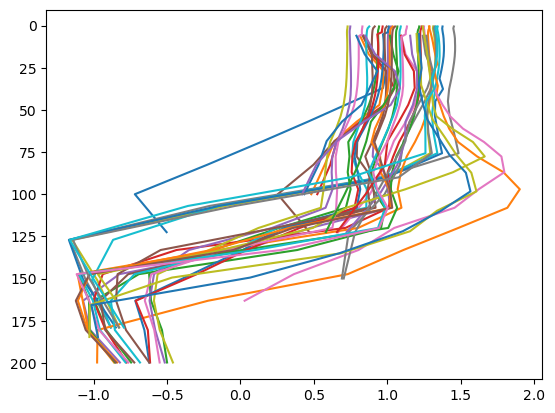

In [93]:
fig, ax = plt.subplots(1,1)
for f in glob.glob('./data/composites/*EL_NINO*.nc'):
    ds = renamer(xr.open_dataset(f))['anomaly']
    mask = [np.nanmean(ds) - 2*np.nanstd(ds), np.nanmean(ds) + 2*np.nanstd(ds)]
    temp = ds.where((ds <= mask[0]) | (ds >= mask[1]), np.nan).sel(lat = slice(-5,5), lon = slice(190,240), depth = slice(0,200)).mean(dim = 'lon')
    ax.plot(temp.mean(dim = 'lat').values, temp.mean(dim = 'lat').depth.values )
ax.invert_yaxis()